In [9]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import *
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.solver import * 
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'
X_test_dsample_dir = './data/X_test_downsample.npy'
y_test_dsample_dir = './data/y_test_downsample.npy' 
X_train_valid_dsample_dir = './data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = './data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)

X_train_val_05_70_dir = './data/band_pass_data/X_train_val_05_70.npy'
X_train_val_01_70_dir = './data/band_pass_data/X_train_val_01_70.npy' 
X_train_val_05_70_ds_dir = './data/band_pass_data/X_train_val_downsample_05_70.npy'
X_train_val_01_70_ds_dir = './data/band_pass_data/X_train_val_downsample_01_70.npy' 

X_train_val_05_70 = np.load(X_train_val_05_70_dir)
X_train_val_01_70 = np.load(X_train_val_01_70_dir) 
X_train_val_05_70_ds = np.load(X_train_val_05_70_ds_dir)
X_train_val_01_70_ds = np.load(X_train_val_01_70_ds_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
encoder_opt = {
    'conv1_size': 15,
    'conv1_out_channel': 22,
    'conv2_size': 15,
    'conv2_out_channel': 44,
    'conv3_size': 15,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'   
}

decoder_opt = {
    'activation': 'none',
    'drop_rate' :0.9, 
    'linear1_out':80,
}
train_options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 150,
}
model = EEGCNNv3(input_size=(1,22,1000),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

(1, 22, 1000)
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	3.383995
0	3.780149	0.283524	1.818241	0.352246	
--Iter 49	4.567337
1	3.860670	0.318733	1.894993	0.323877	
--Iter 49	3.000710
2	3.473065	0.348214	2.137209	0.347518	
--Iter 49	2.979062
3	3.254728	0.356385	1.770066	0.352246	
--Iter 49	4.537284
4	3.029883	0.384687	1.835410	0.382979	
--Iter 49	3.554321
5	3.013101	0.389656	2.136401	0.335697	
--Iter 49	2.329991
6	2.755895	0.392773	1.943426	0.347518	
--Iter 49	2.972507
7	2.720869	0.406671	1.860573	0.366430	
--Iter 49	1.965550
8	2.340220	0.444744	1.770790	0.368794	
--Iter 49	2.687138
9	2.152968	0.469087	1.745611	0.390071	
--Iter 49	1.500801
10	2.007819	0.496631	1.744693	0.387707	
--Iter 49	1.489909
11	1.878080	0.479279	1.795971	0.380615	
--Iter 49	2.468298
12	1.839215	0.487028	1.644355	0.378251	
--Iter 49	2.056504
13	1.622914	0.518531	1.805091	0.378251	
--Iter 49	1.394344
14	1.552717	0.519710	1.729973	0.444444	
--Iter 49	0.897397
15	1.531022	0.548012	1.6246

KeyboardInterrupt: 

In [85]:
encoder_opt = {
    'conv1_size': 3,
    'conv1_out_channel': 22,
    'conv2_size': 3,
    'conv2_out_channel': 44,
    'conv3_size': 3,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.8, 
    'linear1_out': 256, 
    'activation': 'leaky_relu',
}


train_options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-5,
    'epoch_num': 400,
    'downsample_split': True,
}

model = EEGCNNv3(in_channels=22,
                input_size=(1,22,500),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
summary(model.cuda(),(1,22,500))

logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_05_70_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dAuto-1           [-1, 22, 1, 500]           1,452
       BatchNorm2d-2           [-1, 22, 1, 500]              44
         MaxPool2d-3           [-1, 22, 1, 250]               0
          Identity-4           [-1, 22, 1, 250]               0
        Conv2dAuto-5           [-1, 44, 1, 250]           2,904
       BatchNorm2d-6           [-1, 44, 1, 250]              88
         MaxPool2d-7           [-1, 44, 1, 125]               0
          Identity-8           [-1, 44, 1, 125]               0
        Conv2dAuto-9           [-1, 22, 1, 125]           2,904
      BatchNorm2d-10           [-1, 22, 1, 125]              44
        MaxPool2d-11            [-1, 22, 1, 62]               0
         Identity-12            [-1, 22, 1, 62]               0
  EEGCNNv3Encoder-13                 [-1, 1364]               0
           Linear-14                  [

KeyboardInterrupt: 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.385973
--Iter 99	1.366851
0	1.384346	0.285672	1.372968	0.295508	
--Iter 49	1.353198
--Iter 99	1.340391
1	1.364399	0.318396	1.377015	0.301418	
--Iter 49	1.342148
--Iter 99	1.370725
2	1.347802	0.373428	1.356137	0.333333	
--Iter 49	1.330751
--Iter 99	1.312014
3	1.332166	0.402123	1.340638	0.374704	
--Iter 49	1.323423
--Iter 99	1.328712
4	1.313952	0.439564	1.335314	0.364066	
--Iter 49	1.354775
--Iter 99	1.316987
5	1.295717	0.472484	1.304949	0.463357	
--Iter 49	1.242077
--Iter 99	1.289039
6	1.271728	0.513168	1.297467	0.465721	
--Iter 49	1.221775
--Iter 99	1.203884
7	1.257919	0.524666	1.259608	0.536643	
--Iter 49	1.246776
--Iter 99	1.148578
8	1.235729	0.561616	1.266684	0.486998	
--Iter 49	1.262531
--Iter 99	1.240490
9	1.219519	0.562009	1.278353	0.462175	
--Iter 49	1.255587
--Iter 99	1.183601
10	1.206884	0.584807	1.221876	0.555556	
--Iter 49	1.123211
--Iter 99	1.308267
11	1.193993	0.598664	1.260833	0.507092	
--Iter 49

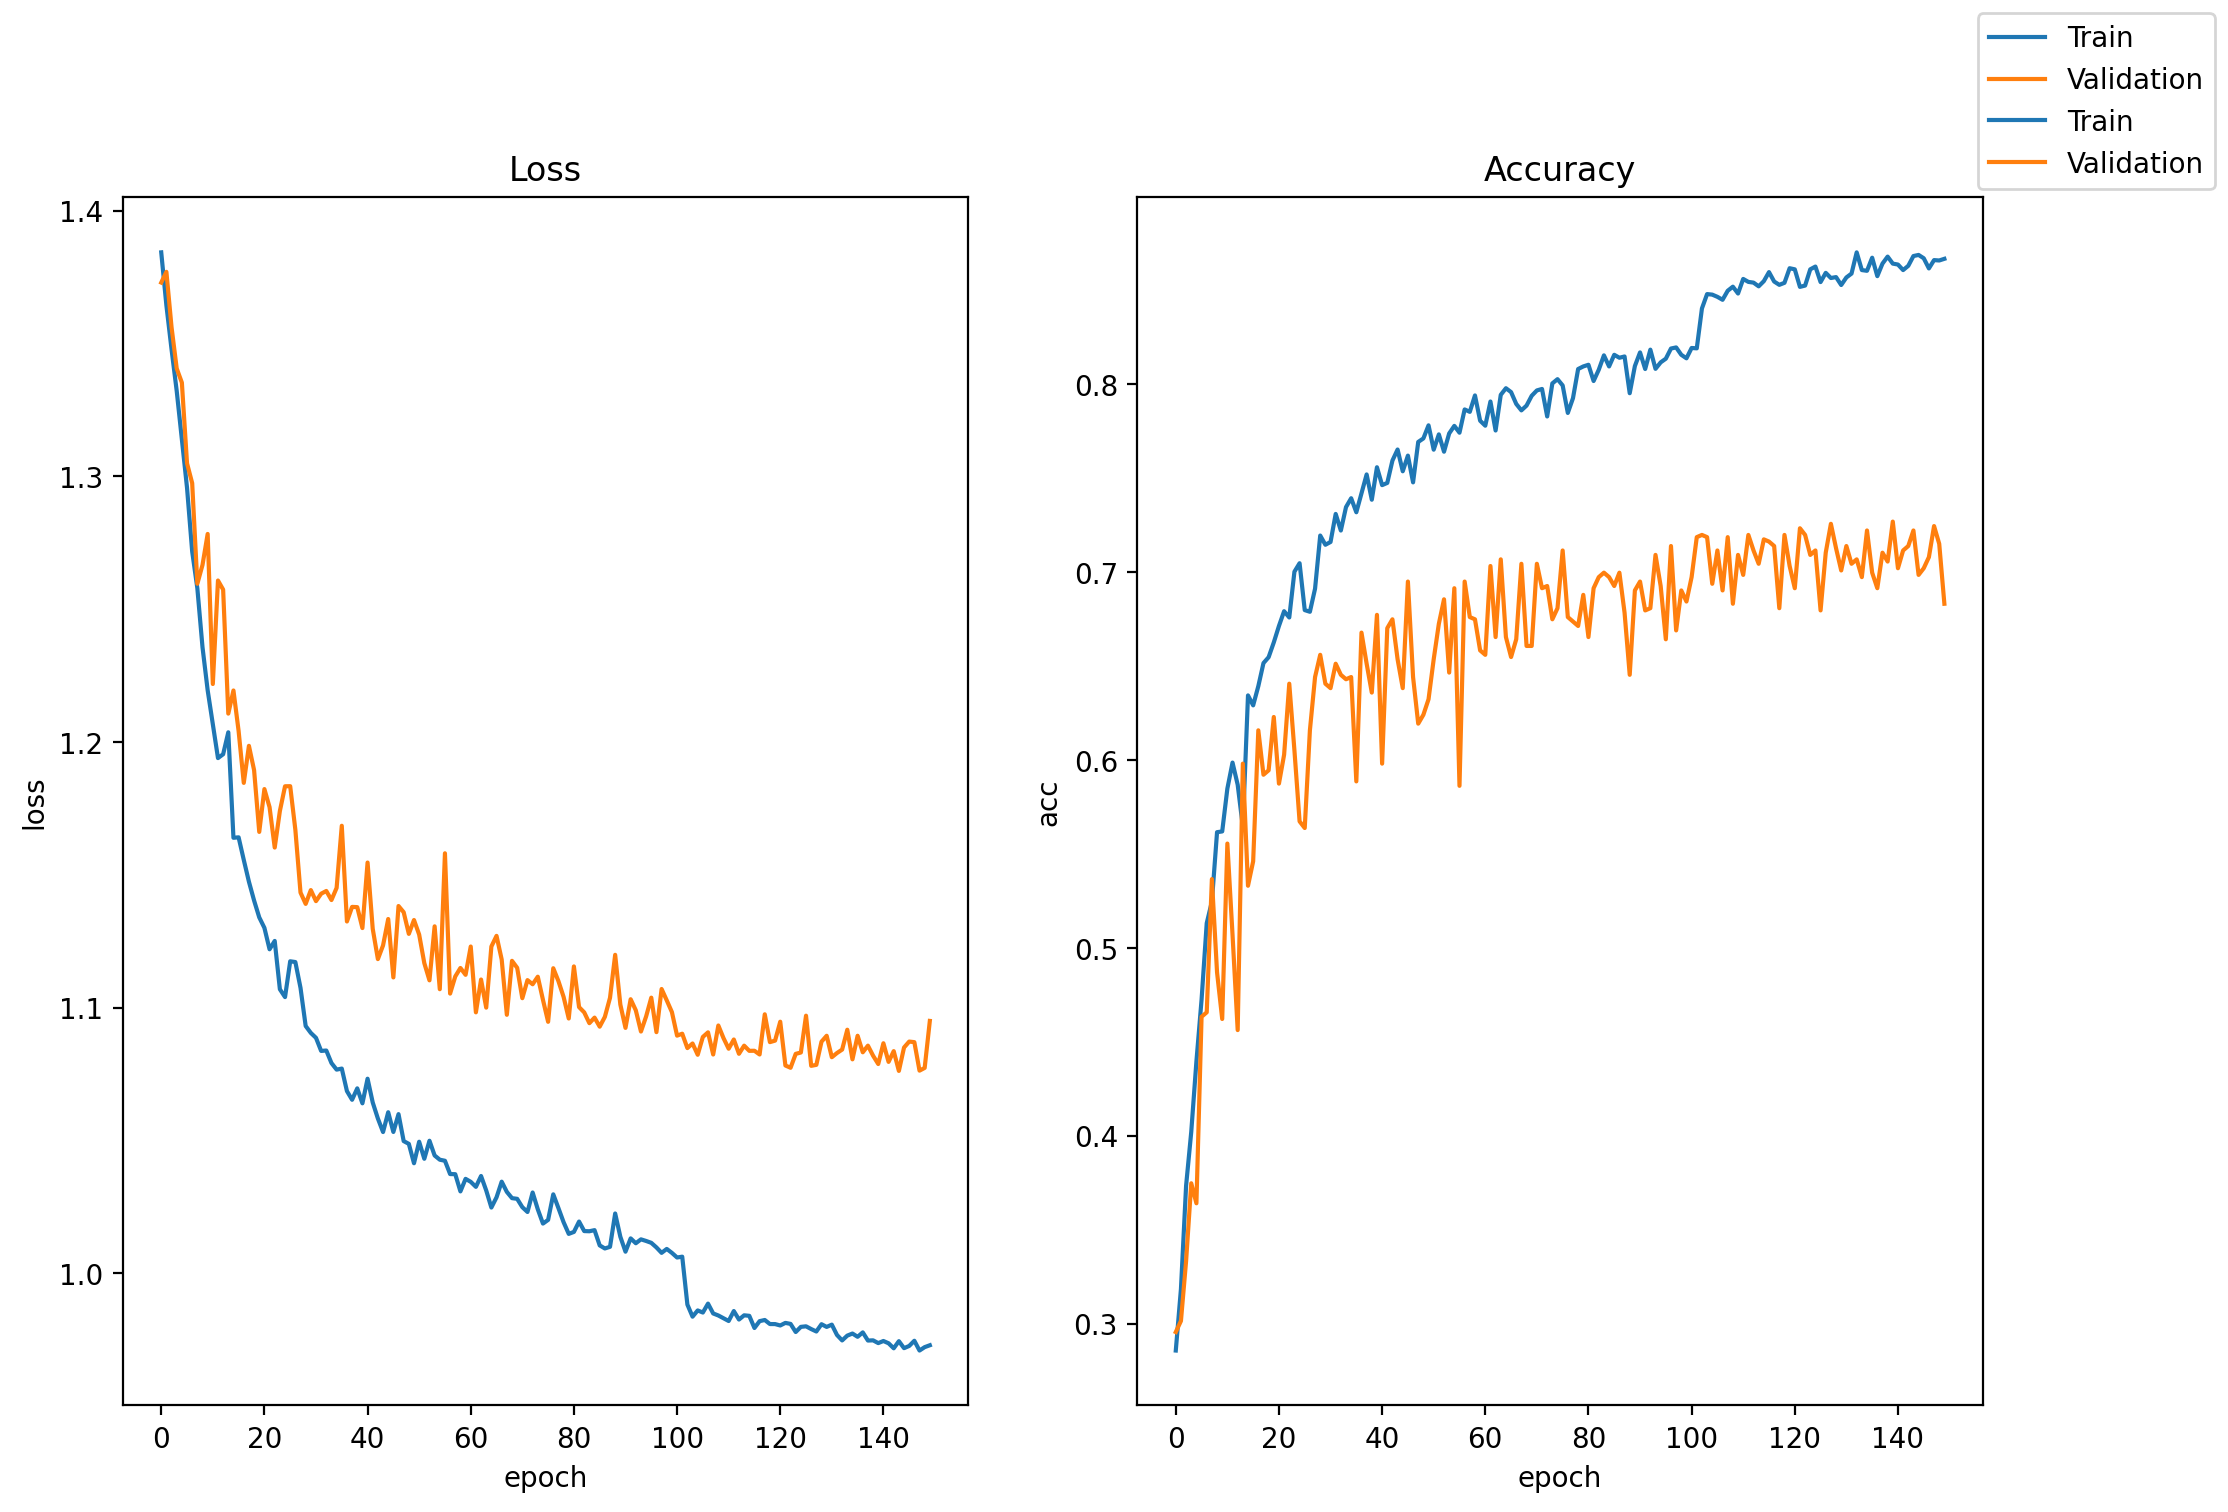

In [9]:

model = ShallowConv2(in_channels=1,classes=4).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_dsample_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)